In [80]:
from scipy import ndimage
from scipy import misc
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition as skd
%matplotlib inline
sns.set_style("darkgrid", {'axes.grid' : False})

Load the image of a scary clown at http://i.imgur.com/X017qGH.jpg into a matrix/array. Plot the progression of the 100 largest singular values for the original image and a randomly shuffled version of the same image (all on the same plot). In a single figure plot a grid of four images: the original image, and a rank $k$ truncated SVD approximation of the original image for $k\in\{2,10,20\}$.

In [81]:
clown = ndimage.imread('crazyClown.jpg', mode='L')
clown.shape

(548, 499)

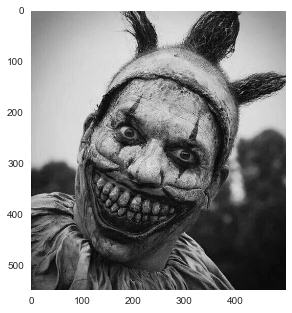

In [82]:
plt.figure(figsize=(11,5))
plt.imshow(clown, cmap='gray')

In [83]:
john = np.ndarray.flatten(clown)
np.random.shuffle(john)
john.shape
john= john.reshape((548,499))

In [84]:
U, s, V = np.linalg.svd(clown, full_matrices=False)
Ur, sr, Vr = np.linalg.svd(john, full_matrices=False)

In [85]:
# Checks
print(U.shape, V.shape, s.shape)
np.allclose(U @ S @ V, clown)

(548, 499) (499, 499) (499,)


True

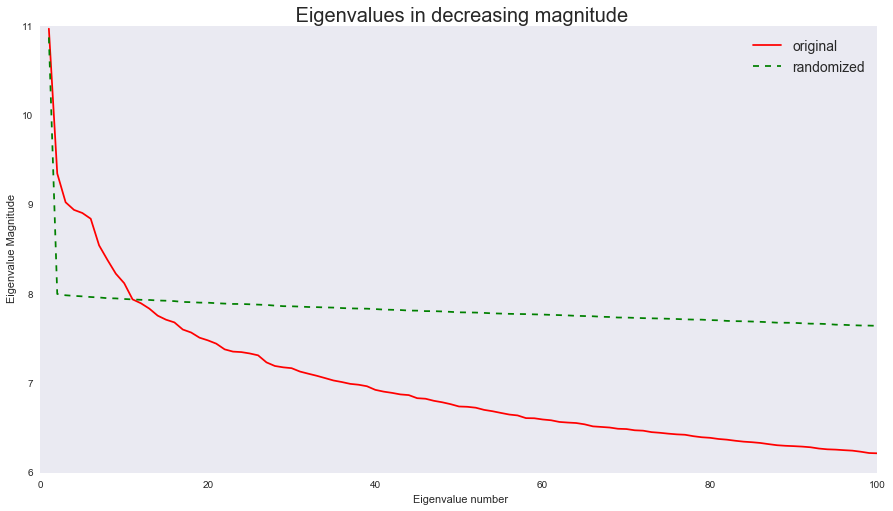

In [86]:
fig = plt.figure(figsize=(15,8))
ax = plt.axes()
plt.title(" Eigenvalues in decreasing magnitude", fontsize=20)
plt.xlabel(" Eigenvalue number")
plt.ylabel(" Eigenvalue Magnitude")
plt.plot(np.linspace(1,100, 100),np.log(s[0:100]),
         color = 'r', label="original")
plt.plot(np.linspace(1,100, 100), np.log(sr[0:100]), 
         color = 'g', label="randomized", linestyle='dashed')
plt.legend(prop={'size':14})

In [87]:
def truncatedSVD(image, k):
    U, s, V = np.linalg.svd(clown, full_matrices=False)
    U_2 = U[:, 0:k]
    S_2 = np.diag(s[0:k])
    V_2 = V[0:k, :]
    
    output = U_2 @ S_2 @ V_2

    return output

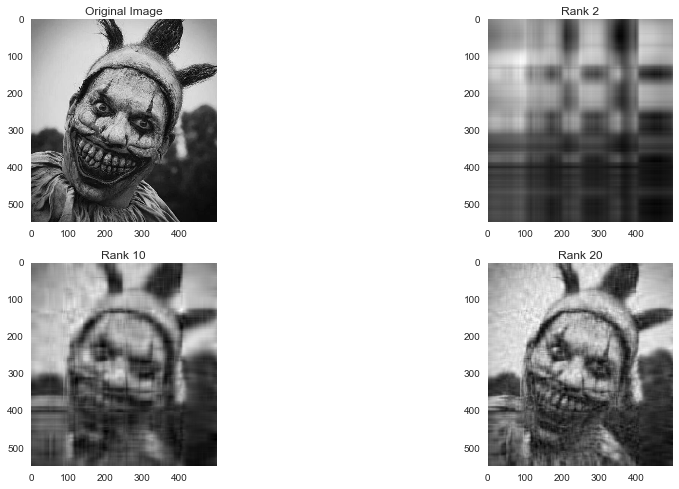

In [88]:
clown_2 = truncatedSVD(clown, 2)
clown_10 = truncatedSVD(clown, 10)
clown_20 = truncatedSVD(clown, 20)

fig = plt.figure(figsize=(15,8))
ax = plt.axes()


plt.subplot(2,2,1)
plt.title("Original Image")
plt.imshow(clown, cmap='gray')


plt.subplot(2,2,2)
plt.title("Rank 2")
plt.imshow(clown_2, cmap='gray')

plt.subplot(2,2,3)
plt.title("Rank 10")
plt.imshow(clown_10, cmap='gray')

plt.subplot(2,2,4)
plt.title("Rank 20")
plt.imshow(clown_20, cmap='gray')